### Import libraries

In [20]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Path of dataset

In [6]:
DATASET_PATH = os.path.join(os.environ['DEV_PATH'], 'dataset/paddy-disease-classification')

### Training dataset
* 10407 rows, 4 columns
    * image_id
    * label
    * variety
    * age

In [7]:
data = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
data.shape

(10407, 4)

In [8]:
data

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


### 10 classes
* bacterial_leaf_blight, bacterial_leaf_streak, bacterial_panicle_blight, blast, brown_spot, dead_heart, downy_mildew, hispa, normal, tungro

In [9]:
data.label.unique()

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [10]:
num_classes = len(data.label.unique())
print('Number of classess:', num_classes)

Number of classess: 10


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [12]:
data.describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


### Distribution Visualization

In [13]:
data['label'].value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

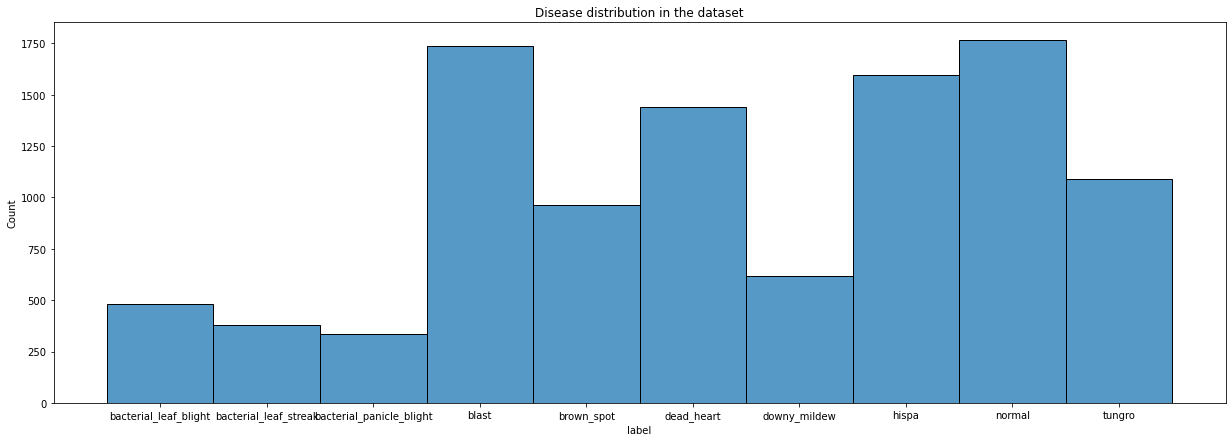

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(21, 7))
sns.histplot(data, x='label', bins=10, ax=axes)
plt.title('Disease distribution in the dataset')
plt.show()

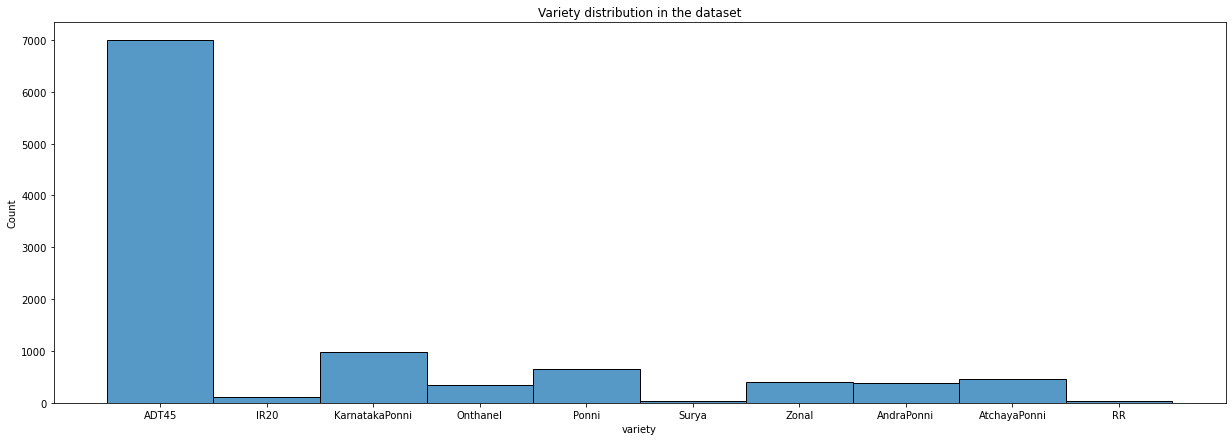

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(21, 7))
sns.histplot(data, x='variety', ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

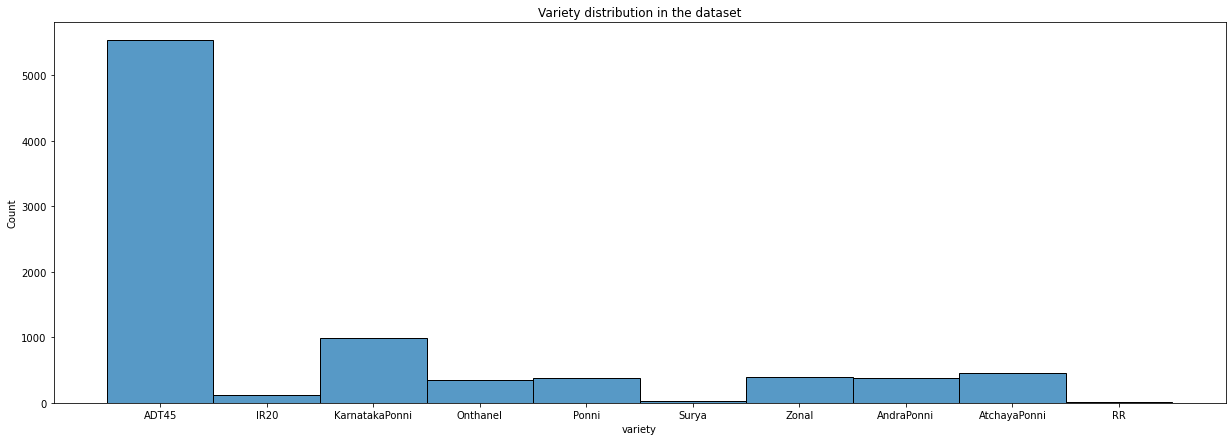

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(21, 7))
sns.histplot(data[data['label'] != 'normal'], x='variety', ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

In [18]:
data[data['label'] != 'normal']['variety'].value_counts()

ADT45             5535
KarnatakaPonni     988
AtchayaPonni       461
Zonal              399
AndraPonni         377
Ponni              376
Onthanel           343
IR20               114
Surya               32
RR                  18
Name: variety, dtype: int64

In [25]:
classes = list(map(os.path.basename, glob(os.path.join(DATASET_PATH, 'train_images/*'))))
classes

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [26]:
images = []
for label in classes:
    images.append(glob(os.path.join(DATASET_PATH, 'train_images', label, '*'))[0])
images

['D:\\dev\\dataset/paddy-disease-classification\\train_images\\bacterial_leaf_blight\\100023.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\bacterial_leaf_streak\\100042.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\bacterial_panicle_blight\\100043.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\blast\\100004.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\brown_spot\\100001.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\dead_heart\\100008.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\downy_mildew\\100017.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\hispa\\100003.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\normal\\100002.jpg',
 'D:\\dev\\dataset/paddy-disease-classification\\train_images\\tungro\\100011.jpg']

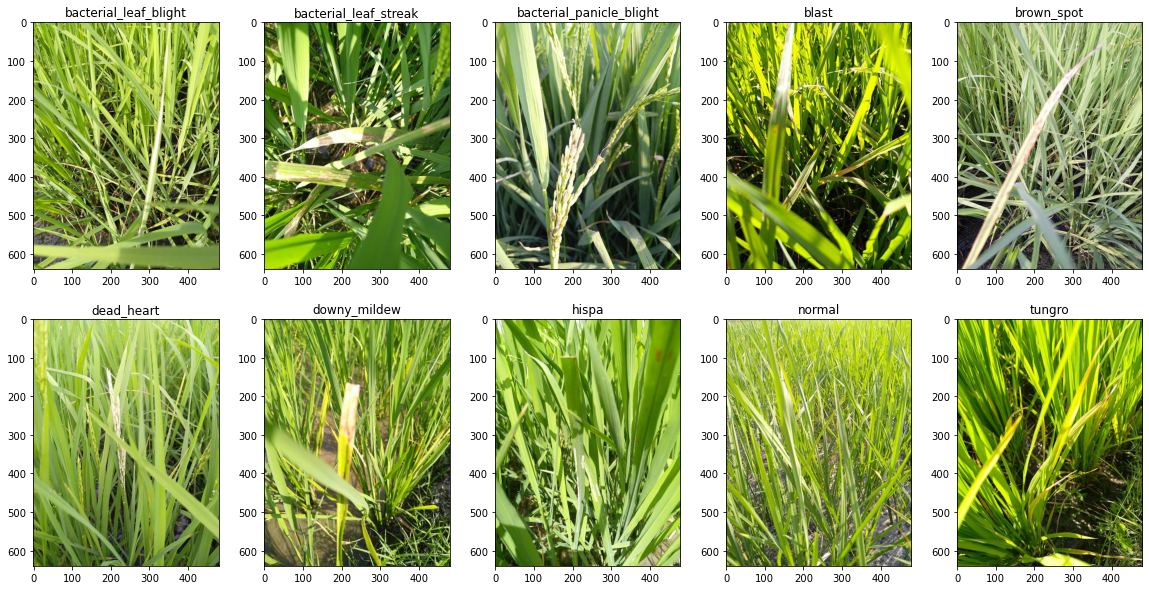

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for ax, label, image_path in zip(axes.ravel(), classes, images):
    image = plt.imread(image_path)
    ax.set_title(label)
    ax.imshow(image, axes=ax)